In [1]:

import pandas as pd
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
x=df.iloc[:,3:]

In [3]:
#you could use the inertia or the silhouette score to select the appropriate
#number of clusters, but with Gaussian mixtures, it is not possible to use these
#metrics because they are not reliable when the clusters are not spherical or have different
#sizes. Instead, you can try to find the model that minimizes a theoretical information criterion 
#such as the Bayesian information criterion (BIC) or the Akaike
#information criterion (AIC),
from sklearn.mixture import GaussianMixture

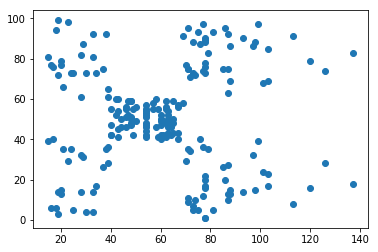

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [24]:
gm_aic=[]
gm_bic=[]
for i in range(1,11):
    gmm1=GaussianMixture(n_components=i)
    gmm1.fit(x)
    gm_aic.append(gmm1.aic(x))
    gm_bic.append(gmm1.bic(x))

In [25]:
n_clusters=range(1,11)


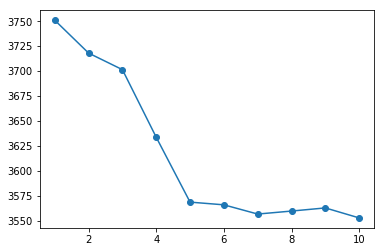

In [27]:
plt.plot(n_clusters,gm_aic,marker='o')

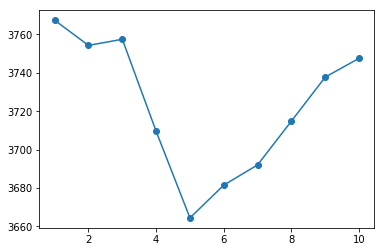

In [28]:
plt.plot(n_clusters,gm_bic,marker='o')

In [29]:
#Rather than manually searching for the optimal number of clusters, it is possible to
#use instead the BayesianGaussianMixture class which is capable of giving weights
#equal (or close) to zero to unnecessary clusters.
#from sklearn.mixture import BayesianGaussianMixture

bgm_weights=[]
for i in range(1,11):
    bgm=BayesianGaussianMixture(n_components=i)
    bgm.fit(x)
    bgm_weights=bgm.weights_

In [32]:
import numpy as np
np.round(bgm.weights_, 2)
#bgm_weights

array([0.01, 0.18, 0.2 , 0.12, 0.13, 0.36, 0.  , 0.  , 0.  , 0.  ])

In [ ]:
#Perfect: the algorithm automatically detected that only 5 clusters are needed, and the
#resulting clusters are almost identical to the ones in aic and bic plot for GaussianMixture

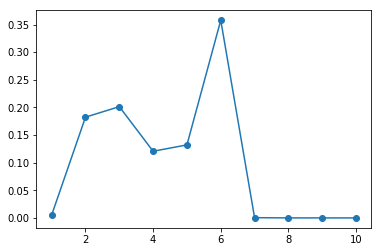

In [31]:
plt.plot(n_clusters,bgm_weights,marker='o')

In [67]:
#now one of method to predict
bgm1=BayesianGaussianMixture(n_components=5)
bgm1.fit(x)
y_pred=bgm1.predict(x)

In [68]:
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [69]:
x['y_pred']=pd.DataFrame(y_pred)

In [70]:
x.head()

,Annual Income (k$),Spending Score (1-100),y_pred
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


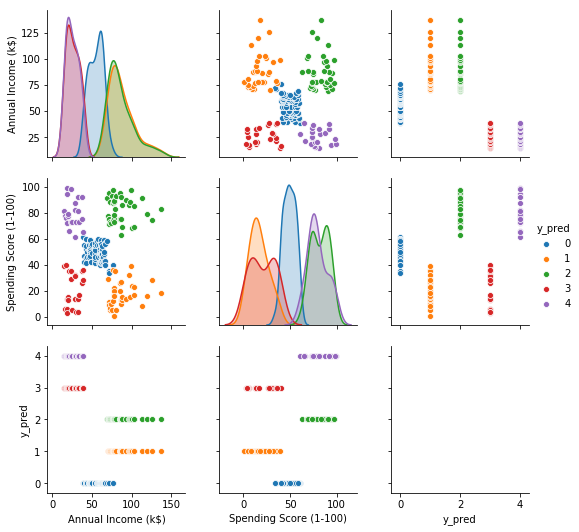

In [71]:
import seaborn as sns
sns.pairplot(x,hue='y_pred')